In [21]:
import json
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ExifTags
import os


In [22]:

def load_ufo_data(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return data

ufo_data = load_ufo_data("/data/ephemeral/home/SY/cv14/code/predictions/output.json")

In [23]:

def visualize_bbox(image_path, points_list):
    
    img = Image.open(image_path)
    
    try:                                                #이미지 회전 예외처리
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = img._getexif()
        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                img = img.rotate(180, expand=True)
            elif exif[orientation] == 6:
                img = img.rotate(270, expand=True)
            elif exif[orientation] == 8:
                img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass
    
    draw = ImageDraw.Draw(img)

    
    for points in points_list:
        if points:  
            flat_points = [(point[0], point[1]) for point in points]  
            draw.polygon(flat_points, outline="red", width=2)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

def show_random_image_with_bbox(ufo_data, base_image_path):
   
    random_image_key = random.choice(list(ufo_data["images"].keys()))
    # random_image_key= "extractor.th.in_house.appen_000830_page0001.jpg"
    image_info = ufo_data["images"][random_image_key]

    language_code = random_image_key.split('.')[1]  # 'vi', 'th', 'ja', 'zh'
    
    language_folders = {
        'vi': 'vietnamese_receipt',
        'th': 'thai_receipt',
        'ja': 'japanese_receipt',
        'zh': 'chinese_receipt'
    }
    
    # 이미지 경로 생성
    folder_name = language_folders.get(language_code)
    image_path = os.path.join(base_image_path, folder_name, 'img', 'test', random_image_key)

    points_list = [word_info["points"] for word_info in image_info["words"].values() if word_info["points"]]
    print(f"image: {random_image_key}")
    
    visualize_bbox(image_path, points_list)




image: extractor.vi.in_house.appen_000355_page0001.jpg


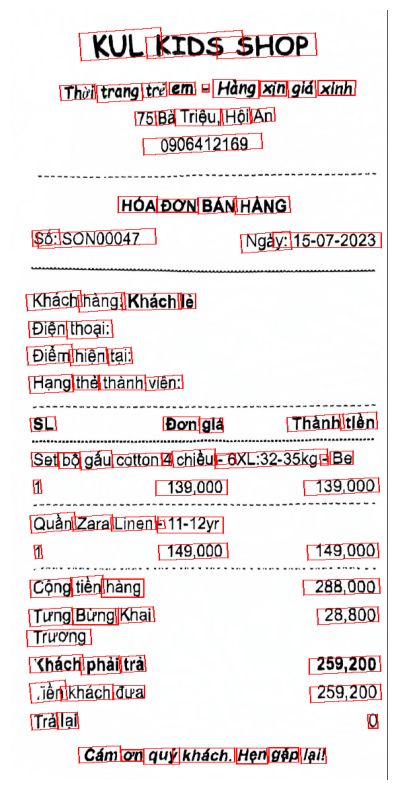

In [ ]:

ufo_data = load_ufo_data("/data/ephemeral/home/SY/cv14/code/predictions/output.json")  #output 경로
base_image_path = "/data/ephemeral/home/data"  # 이미지 저장 경로
show_random_image_with_bbox(ufo_data, base_image_path)


